# 2. Clasificación con el Algoritmo del Perceptrón
* Es un algoritmo desarrollado para clasificar datos en dos categorías (1 ó -1) (1 ó 0), si es que estos son linealmente separables.
* El vector de pesos (w) y el umbral (b) son parámetros a aprender.
* Este clasificador lineal binario separa el espacio de los datos en 2, esta separacion la hace mediante una frontera
* A un laado de la forntera quedan los positivos (1) y al otro lado los negativos (-1).

## Datos

* Implementaremos una versión básica del algoritmo del perceptrón para clasificación binaria.
* En este caso los datos de entrada serán de **dos dimensiones**.
* Usaremos scikit-learn ([make_classification](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html)) para generar datos aleatorios de dos dimensiones, divididos en dos clases etiquetadas con los valores 1 y -1.
* Los datos serán linealmente separables. Fijamos la semilla aleatoria para obtener siempre los mismos resultados.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# make_classification= genera datos 

from sklearn.datasets import make_classification

# genero un dataset de dos clases
size = 100 # cuantos puntos quiero
X, y_true = make_classification(n_samples=size, n_features=2, # seteo 2 dimensiones
                                   n_redundant=0, n_informative=2,
                                   n_clusters_per_class=1, class_sep=0.5,
                                   random_state=1)

# A todos los valores 0 los convertimos en -1
y_true[y_true == 0] = -1

In [3]:
X.shape
# 100 registros con dos valores cada dregistro

(100, 2)

* Graficamos para ver el resultado. Acá, los azules son 1, los rojos -1.

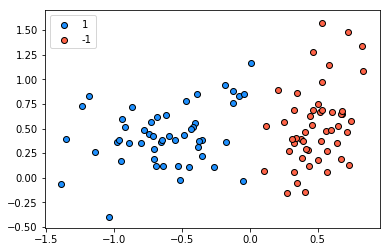

In [4]:
plt.scatter(X[y_true==1, 0], X[y_true==1, 1], color="dodgerblue", edgecolors='k', label="1")
plt.scatter(X[y_true==-1, 0], X[y_true==-1, 1], color="tomato", edgecolors='k', label="-1")
plt.legend()
plt.show()

### División en Entrenamiento y Evaluación

In [5]:
# como ya genere aleatoriamente los datos, no uso la funcion para separar aleatoriamente.

train_size = 60 # elijo que los datos de train sean los primeros 60 datos
test_size = size - train_size
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y_true[:train_size], y_true[train_size:]

In [6]:
X_train.shape, X_test.shape

((60, 2), (40, 2))

## Algoritmo del Perceptrón

### Inicialización

Comenzamos a partir de un vector cualquiera:

In [7]:
# Para comenzar elijo un vector cualquiera menos de ceros... 
# Elijo que sea un vector de unos
w = np.ones(2)

In [8]:
w

array([1., 1.])

### Predicción

Definimos la función de predicción:

In [9]:
def predict(X, w):
    return np.sign(np.dot(X, w)) 

# Producto punto = multiplico X*w y veo el signo para saber si lo clasifica en el grupo de 1 o -1

Probamos predecir con el primer modelo:

In [10]:
# predecimos para los datos de test y vemos que a unos los clasifica como 1 y otros como -1
y_pred = predict(X_test, w)
y_pred

array([ 1.,  1., -1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
       -1., -1., -1.,  1.,  1., -1., -1.,  1.,  1.,  1., -1., -1., -1.,
        1.,  1., -1., -1.,  1., -1.,  1.,  1., -1.,  1., -1., -1.,  1.,
        1.])

In [11]:
y_train[0], y_pred[0]

(1, 1.0)

### Evaluación

* Calcularemos la **"accuracy"** sobre los datos de evaluación= Proporción de cuantos datos coinciden entre los predichos y los originales

In [12]:
def accuracy(y_true, y_pred):
    # sumo las coincidencias (y_true == y_pred) y divido por la cantidad total de elementos (y_true)
    return (y_true == y_pred).sum() / y_true.shape[0] 

In [13]:
accuracy(y_test, y_pred)

0.1

* En este caso el resultado es muy bajo. ACC=0.1 -> solo el 10% de los datos estan siendo bien etiquetados
* Está bien que de bajo, porque yo elegí al azar el W como 1 para comenzar... (no es el W óptimo)

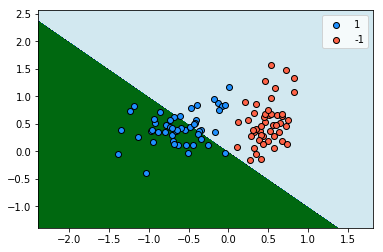

In [14]:
# Graficamos la frontera de decisión:

from utils import plot_decision_boundary
plot_decision_boundary(lambda x: predict(x, w), X, y_true)

### Damos un Paso de Actualización con el Algoritmo

* Primero debemos buscar un elemento de entrenamiento mal clasificado:

In [15]:
y_pred = predict(X_train, w)

In [16]:
# comparo los datos de entrenamiento y busco un dato mal etiquetado

# todos los datos con los índices anteriormente listados, están mal etiquetados.
# elijo el dato de índice 0 para hacer el primer paso de actualizaciónal algoritmo.
np.where((y_train == y_pred) == False)

(array([ 0,  1,  2,  3,  6,  7,  8, 10, 11, 12, 13, 14, 15, 17, 19, 21, 22,
        23, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40,
        41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 54, 55, 56, 57, 59],
       dtype=int64),)

* Chequeamos que verdaderamente no coincida la etiqueta de ese dato con la etiqueta predicha.

In [17]:
y_train[0], y_pred[0]
# vemos que esta mal clasificado, esta como -1 cuando deberia ser 1

(1, -1.0)

* Tomamos el dato de índice 0

In [18]:
i = 0
xi, yi = X_train[i], y_train[i]

* Probamos graficar el punto para saber en donde cae

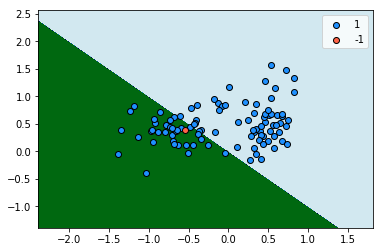

In [20]:
y2 = np.ones(size)
y2[i] = -1
plot_decision_boundary(lambda x: predict(x, w), X, y2)

# En rojo tenemos el punto mal etiquetado 

* Ahora actualicemos el modelo y veamos si se corrige la clasificación:
* Para rotar el plano, actualizamos W

In [21]:
r = 1.0  # learning rate
new_w = w + r * xi * yi

# vemos la nueva predicción, ahora es correcta y lo etiqueta como 1
predict(xi, new_w)

1.0

* Probemos otras tasas de aprendizaje, a ver qué pasa:

In [22]:
for r in [0.001, 0.01, 0.1, 0.5, 1.0]:
    new_w = w + r * xi * yi
    print(r, predict(xi, new_w))

0.001 -1.0
0.01 -1.0
0.1 -1.0
0.5 1.0
1.0 1.0


* Para **r** muy bajos el algoritmo no corrige el dato
* Si **r** es mas alto (1) el algoritmo converge más rpido
* Lo dejamos en $r=1$. 
* Evaluemos el nuevo modelo, para ver si mejora el resultado:

In [23]:
y_pred = predict(X_test, new_w)
accuracy(y_test, y_pred)
# la accuracy mejora de 0.1 a 0.3

0.3

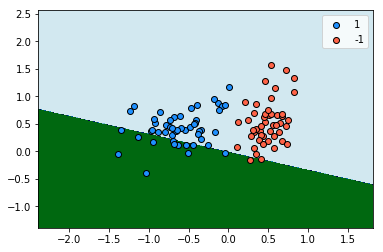

In [24]:
plot_decision_boundary(lambda x: predict(x, new_w), X, y_true)

## Perceptrón: Algoritmo completo

* Implementaremos el algoritmo completo, iterando hasta que todos los datos de entrenamiento estén clasificados correctamente.
* Metemos todo lo anterior en un **loop** o un **for**

In [25]:
w = np.ones(2)

r = 1.0
step = 0
finished = False
while not finished: # itera gasta que finished sea true
    # 1. predecir usando el modelo actual
    y_pred = predict(X_train, w)
    y_test_pred = predict(X_test, w)
    
    # 2. evaluar
    train_acc = accuracy(y_train, y_pred)
    test_acc = accuracy(y_test, y_test_pred)
    print(f'step={step}\ttrain_acc={train_acc:0.2}\ttest_acc={test_acc:0.2}')

    # 3. si no clasifica todo bien, actualizar modelo
    if (y_train == y_pred).all():
        finished = True
    else:
        indices = np.where((y_train == y_pred) == False)
        i = indices[0][0]
        xi, yi = X_train[i], y_train[i]
        w = w + r * xi * yi
        
        step = step + 1 # cuento cunatos pasos llevo

step=0	train_acc=0.17	test_acc=0.1
step=1	train_acc=0.47	test_acc=0.3
step=2	train_acc=0.5	test_acc=0.47
step=3	train_acc=0.58	test_acc=0.6
step=4	train_acc=1.0	test_acc=0.95


* A medida que aumentamos la cantidad de iteraciones va mejorando el accuracy
* Grafiquemos el resultado final:

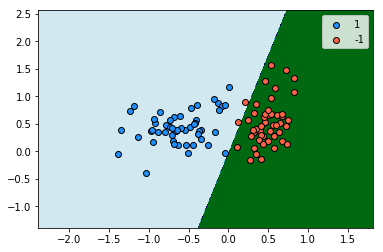

In [26]:
plot_decision_boundary(lambda x: predict(x, w), X, y_true)

## Ejercicios

1. Experimentar con otras tasas de aprendizaje.
2. Generar datos no linealmente separables (probar achicando el valor de 'class_sep' en 'make_classification').
3. Adaptar el algoritmo del perceptrón para que funcione con estos datos (ver variante "pocket" en [Wikipedia](https://en.wikipedia.org/wiki/Perceptron)).

## Referencias

- [Perceptron (Wikipedia)](https://en.wikipedia.org/wiki/Perceptron)
- [Perceptron Learning Algorithm: A Graphical Explanation Of Why It Works](https://towardsdatascience.com/perceptron-learning-algorithm-d5db0deab975)
- Gallant, S. I. (1990). [Perceptron-based learning algorithms.](https://ftp.cs.nyu.edu/~roweis/csc2515-2006/readings/gallant.pdf) IEEE Transactions on Neural Networks, vol. 1, no. 2, pp. 179–191. 

Scikit-learn:

- [make_classification](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html)
- [Perceptron](https://scikit-learn.org/stable/modules/linear_model.html#perceptron)
